✅ Dataset loaded successfully! Classes: {'CLL': 0, 'FL': 1, 'MCL': 2}
✅ Number of train batches: 7
✅ Number of val batches: 2


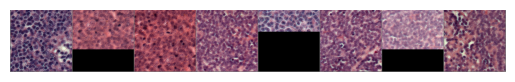

In [4]:
# notebooks/load_tiles.ipynb

# --- Install required libraries if needed ---
# !pip install torch torchvision

# --- Fix path to scripts ---
import sys
sys.path.append("../scripts")

# --- Import data loading function ---
from data_loader import load_tile_dataset
import os

# --- Define Paths ---
processed_tiles_folder = "../data/processed_tiles/"

# --- Load Dataset ---
batch_size = 32
image_size = 224  # Must match your CNN input size

train_loader, val_loader, class_names = load_tile_dataset(

    data_dir=processed_tiles_folder,
    batch_size=batch_size,
    shuffle=True,
    image_size=image_size
)

print(f"✅ Dataset loaded successfully! Classes: {class_names}")
print(f"✅ Number of train batches: {len(train_loader)}")
print(f"✅ Number of val batches: {len(val_loader)}")
# --- Peek at one batch (optional, visualization) ---

import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torch

def imshow(img):
    img = img / 2 + 0.5     # unnormalize from [-1, 1] to [0, 1]
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()

# Get a batch of training data
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images[:8]))



📊 Class Distribution:
Class 'FL' (1): 63 tiles
Class 'MCL' (2): 64 tiles
Class 'CLL' (0): 70 tiles


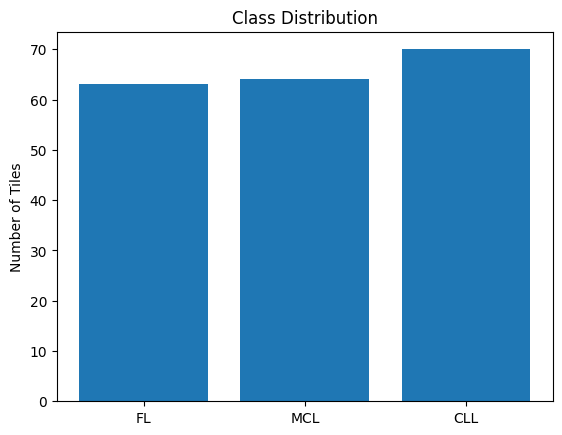

In [3]:
# --- Check Class Imbalance ---

from collections import Counter
import numpy as np

# Extract labels
all_labels = []

for _, labels in train_loader:
    all_labels.extend(labels.numpy())

# Count labels
label_counts = Counter(all_labels)

# Map label indices back to class names
idx_to_class = {v: k for k, v in class_names.items()}

print("\n📊 Class Distribution:")
for idx, count in label_counts.items():
    print(f"Class '{idx_to_class[idx]}' ({idx}): {count} tiles")

# Optional: Plot class imbalance
import matplotlib.pyplot as plt

plt.bar([idx_to_class[idx] for idx in label_counts.keys()], label_counts.values())
plt.title('Class Distribution')
plt.ylabel('Number of Tiles')
plt.show()
